In [1]:
import numpy as np
import pandas as pd
import os
import itertools

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Setup

In [2]:
data_training = pd.read_csv("dataset/train.csv")
data_goal = pd.read_csv("dataset/test.csv")

## Data exploration

In [3]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_training.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data_training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data_training.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data cleaning
We must make sure to remove :
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

### Empty values cleanup

In [8]:
len(data_training[data_training.duplicated() == True])

0

### Column by column analysis

In [9]:
print('The collumns are:', ", ".join(data_training.columns))

The collumns are: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


#### PassagerId

In [10]:
print('Has nans:', data_training['PassengerId'].hasnans)
print('Has duplicates', data_training['PassengerId'].duplicated().any())

Has nans: False
Has duplicates False


#### Survived

In [11]:
print('Unique values: ', data_training['Survived'].unique())

Unique values:  [0 1]


#### Pclass

In [12]:
print('Unique values: ', data_training['Pclass'].unique())

Unique values:  [3 1 2]


#### Name
We can reasonably doubt that the name of the passagers had any impact on whether or not they were victims, therefore we will not include this feature.

In [13]:
print('Has duplicate values: ', data_training['Name'].duplicated().any())

Has duplicate values:  False


In [14]:
data_training['Title'] = data_training['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]
data_goal['Title'] = data_goal['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

In [15]:
titles = list(set(data_training['Title'].unique()))
titles += list(set(data_goal['Title'].unique()))
print('List of the titles of the passengers:', titles)

List of the titles of the passengers: ['Mme', 'Ms', 'Lady', 'Capt', 'Miss', 'Dr', 'Major', 'Rev', 'Col', 'Sir', 'Jonkheer', 'Mr', 'Mrs', 'Master', 'Don', 'Mlle', 'th', 'Ms', 'Dona', 'Miss', 'Dr', 'Rev', 'Col', 'Mr', 'Mrs', 'Master']


#### Sex

In [16]:
print('Initial unique values:', data_training['Sex'].unique())

Initial unique values: ['male' 'female']


In [17]:
# We create a feature "Sex Num"
def numericize_sex_feature(data, must_display_result=False):
    
    if not numericize_sex_feature.labelEncoder: 
        numericize_sex_feature.labelEncoder = LabelEncoder()
        numericize_sex_feature.labelEncoder.fit(data['Sex'])
        
    data['Sex_Num'] = numericize_sex_feature.labelEncoder.transform(data['Sex'])
    
    if must_display_result:
        print(dict(enumerate(numericize_sex_feature.labelEncoder.classes_)))
        
numericize_sex_feature.labelEncoder = None

In [18]:
numericize_sex_feature(data_training, must_display_result=True)

{0: 'female', 1: 'male'}


#### Age

In [19]:
# We will use a simple approach to fill the missing values for the age : we will insert the average value
# data_training.loc[data_training['Age'].isnull(), 'Age'] = data_training['Age'].mean()

print('Age range:', np.min(data_training['Age']), 'to', np.max(data_training['Age']))

Age range: 0.42 to 80.0


#### SibSp

In [20]:
print('Unique values:', data_training['SibSp'].unique())

Unique values: [1 0 3 4 2 5 8]


#### Parch

In [21]:
print('Unique values:', data_training['Parch'].unique())

Unique values: [0 1 2 5 3 4 6]


#### Ticket
For the moment, we will not use this information as it is not clear yet how it can be used as every value is unique

In [22]:
print('Number unique values:', len(data_training['Ticket'].unique()))

Number unique values: 681


In [23]:
def clean_ticket_code_feature(data): 
    
    data['Ticket_Code'] = data['Ticket'].str.split(' ', expand=False).apply(lambda list : " ".join(list[:-1]))
    data['Ticket_Code'] = data['Ticket_Code'].apply(lambda string : string.upper())
    data['Ticket_Code'] = data['Ticket_Code'].apply(lambda string : string.replace(" ", ""))
    data['Ticket_Code'] = data['Ticket_Code'].apply(lambda string : string.replace(".", ""))
    data['Ticket_Code'] = data['Ticket_Code'].apply(lambda string : string.replace("/", ""))

    # Manual adjustments after examining the data
    data.loc[data['Ticket_Code'] == 'FC', 'Ticket_Code'] = 'FCC'
    data.loc[data['Ticket_Code'] == 'AS', 'Ticket_Code'] = 'A5'
    
    return data['Ticket_Code']

# Prepare the label encoder
# We prepare it with the test data because some labels appear only in the test label
ticket_feature_labelEncoder = None
unique_labels = clean_ticket_code_feature(pd.concat([data_training, data_goal])).unique()
ticket_feature_labelEncoder = LabelEncoder()
ticket_feature_labelEncoder.fit(unique_labels)
    
def numericize_ticket_feature(data, must_display_result=False):
    
    # Prepare the ticket code feature
    clean_ticket_code_feature(data)
        
    data['Ticket_Code_Num'] = ticket_feature_labelEncoder.transform(data['Ticket_Code'])
    
    if must_display_result:
        print('Unique Ticket codes:\n', data['Ticket_Code'].unique())
        print(dict(enumerate(ticket_feature_labelEncoder.classes_)))

numericize_ticket_feature.labelEncoder = None

In [24]:
numericize_ticket_feature(data_training, must_display_result=True)

Unique Ticket codes:
 ['A5' 'PC' 'STONO2' '' 'PP' 'CA' 'SCPARIS' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'C' 'SOP' 'FA' 'FCC' 'SWPP' 'SCOW' 'PPP' 'SC' 'SCAH'
 'SCAHBASLE' 'SOPP' 'SOTONO2' 'CASOTON']
{0: '', 1: 'A2', 2: 'A4', 3: 'A5', 4: 'AQ3', 5: 'AQ4', 6: 'C', 7: 'CA', 8: 'CASOTON', 9: 'FA', 10: 'FCC', 11: 'LP', 12: 'PC', 13: 'PP', 14: 'PPP', 15: 'SC', 16: 'SCA3', 17: 'SCA4', 18: 'SCAH', 19: 'SCAHBASLE', 20: 'SCOW', 21: 'SCPARIS', 22: 'SOC', 23: 'SOP', 24: 'SOPP', 25: 'SOTONO2', 26: 'SOTONOQ', 27: 'SP', 28: 'STONO2', 29: 'STONOQ', 30: 'SWPP', 31: 'WC', 32: 'WEP'}


#### Fare

In [25]:
print('Number unique values:', len(np.sort(data_training['Fare'].unique())))
print('Fare range :', data_training['Fare'].min(), 'to', data_training['Fare'].max())

Number unique values: 248
Fare range : 0.0 to 512.3292


#### Cabin

In [26]:
print('Unique values:', data_training['Cabin'].unique())

Unique values: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [27]:
# We create a feature "Cabin Code Num"
def numericize_cabine_code_feature(data, must_display_result=False):
    
    # Prepare the cabin code feature
    data.loc[data['Cabin'].notnull(), 'Cabin_Code'] = data['Cabin'].str[0]
    
    if not numericize_cabine_code_feature.labelEncoder: 
        numericize_cabine_code_feature.labelEncoder = LabelEncoder()
        numericize_cabine_code_feature.labelEncoder.fit(data['Cabin_Code'])
        
    data['Cabin_Code_Num'] = numericize_cabine_code_feature.labelEncoder.transform(data['Cabin_Code'])
    
    if must_display_result:
        print(dict(enumerate(numericize_cabine_code_feature.labelEncoder.classes_)))

numericize_cabine_code_feature.labelEncoder = None

In [28]:
numericize_cabine_code_feature(data_training, must_display_result=True)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T', 8: nan}


#### Embarked

In [29]:
print('Unique values:', data_training['Embarked'].unique())

Unique values: ['S' 'C' 'Q' nan]


In [30]:
# We create a feature "Embarked Num"
def numericize_embarked_feature(data, must_display_result=False):
    
    if not numericize_embarked_feature.labelEncoder: 
        numericize_embarked_feature.labelEncoder = LabelEncoder()
        numericize_embarked_feature.labelEncoder.fit(data['Embarked'])
        
    data['Embarked_Num'] = numericize_embarked_feature.labelEncoder.transform(data['Embarked'])
    
    if must_display_result:
        print(dict(enumerate(numericize_embarked_feature.labelEncoder.classes_)))

numericize_embarked_feature.labelEncoder = None

In [31]:
numericize_embarked_feature(data_training, must_display_result=True)

{0: 'C', 1: 'Q', 2: 'S', 3: nan}


### Features preparation function

In [32]:
def prepare_features(data):
    numericize_sex_feature(data)
    numericize_ticket_feature(data)
    numericize_cabine_code_feature(data)
    numericize_embarked_feature(data)

## Experimenting with a Decision Tree Classifier models
### Decision Tree

In [33]:
input_columns = ['Pclass', 'Sex_Num', 'Age', 'SibSp', 'Parch', 'Ticket_Code_Num', 'Fare', 'Cabin_Code_Num', 'Embarked_Num']
output_column = ['Survived']

training_dataset = data_training.loc[:, list(itertools.chain(*[input_columns, output_column]))]
X, Y = training_dataset.loc[:, input_columns], data_training.loc[:, output_column]

In [34]:
training_dataset.corr()

,Pclass,Sex_Num,Age,SibSp,Parch,Ticket_Code_Num,Fare,Cabin_Code_Num,Embarked_Num,Survived
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.050679,-0.549500,0.746616,0.157112,-0.338481
Sex_Num,0.131900,1.000000,0.093254,-0.114631,-0.245489,0.018185,-0.182333,0.123076,0.104057,-0.543351
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.025299,0.096067,-0.267270,-0.025252,-0.077221
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.000451,0.159651,0.041540,0.066654,-0.035322
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.013832,0.216225,-0.032548,0.038322,0.081629
Ticket_Code_Num,-0.050679,0.018185,0.025299,0.000451,0.013832,1.000000,0.102305,0.000090,-0.034308,-0.003120
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,0.102305,1.000000,-0.523013,-0.221226,0.257307
Cabin_Code_Num,0.746616,0.123076,-0.267270,0.041540,-0.032548,0.000090,-0.523013,1.000000,0.187015,-0.301116
Embarked_Num,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.034308,-0.221226,0.187015,1.000000,-0.163517
Survived,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,-0.003120,0.257307,-0.301116,-0.163517,1.000000


In [35]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2,  
                                                    random_state=None, 
                                                    shuffle=True, 
                                                    stratify=None)

In [36]:
# # Training the model
clf_decision_tree = tree.DecisionTreeClassifier()

In [37]:
# Determining a validation accuracy
validation_accurcy = cross_val_score(clf_decision_tree, 
                                     X_train, 
                                     y=y_train, 
                                     scoring=None, 
                                     cv=8).mean()
print('Validation accuracy:', validation_accurcy)

Validation accuracy: 0.7780898876404494


In [38]:
# Determining a test accurcay
def evaluate_test_accuracy(model):
    # Training only on the test data
    model = model.fit(X_train, y_train)
    
    # Compute the test accuraxcy
    y_predicted = clf_decision_tree.predict(X_test)
    score = accuracy_score(y_test, y_predicted, normalize=True)
    print('Test accuracy score:', score)

In [39]:
evaluate_test_accuracy(clf_decision_tree)

Test accuracy score: 0.8268156424581006


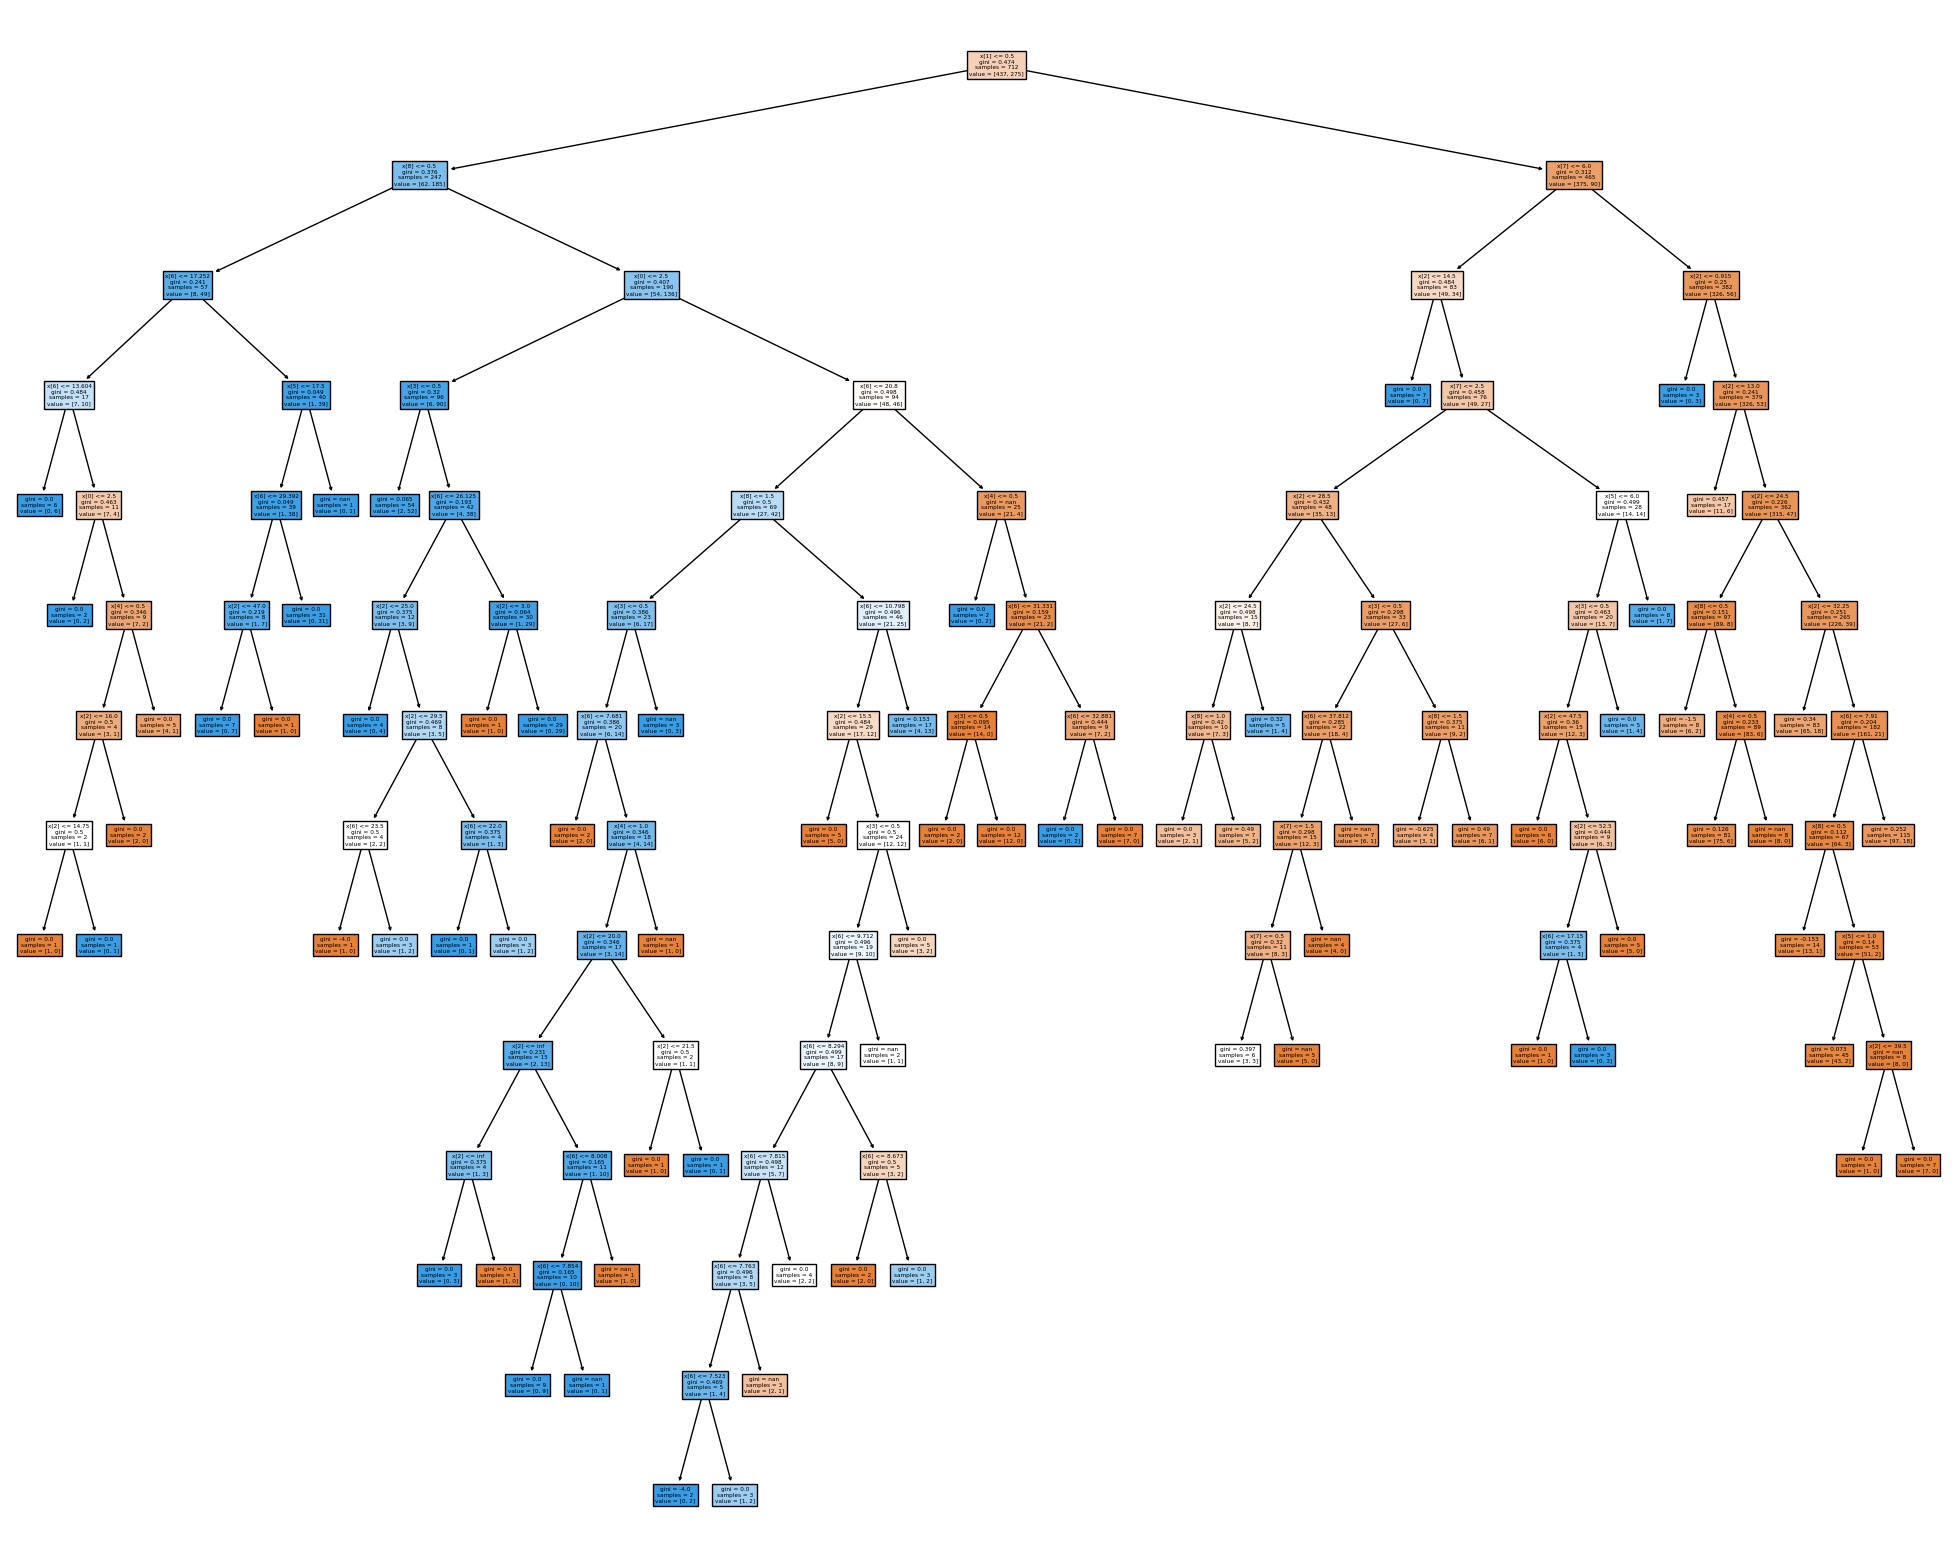

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_decision_tree, 
                   # feature_names=iris.feature_names,  
                   # class_names=iris.target_names,
                   filled=True)

### First submission

In [41]:
# Prepare the goal dataset
prepare_features(data_goal)
goal_dataset = data_goal.loc[:, input_columns]
X_goal = goal_dataset.loc[:, input_columns]

def prepare_submission(model):
    # Training on all the data before going to the goal data
    clf_decision_tree.fit(pd.concat([X_train, X_test]), 
                          pd.concat([y_train, y_test]))
    
    # Generate the predictions CSV
    predictions = model.predict(X_goal)
    submission = pd.DataFrame(data={'PassengerId': data_goal['PassengerId'],
                                    'Survived': predictions})

    submission.to_csv('submission.csv', index=False)

In [42]:
prepare_submission(clf_decision_tree)

** An accuracy of 0.73684 was achieved

#### Exploring the tuning of hyper-parameters

In [43]:
param_grid = {"criterion": ['gini', 'entropy', 'log_loss'],
              "max_depth": np.arange(start=3, stop=10),
              "min_samples_split": np.arange(start=2, stop=20, step=2),
              "max_leaf_nodes": np.arange(start=2, stop=20, step=2)}

gridSearch = GridSearchCV(estimator=clf_decision_tree,
                          param_grid=param_grid,
                          n_jobs=None,
                          cv=5,
                          verbose=1,
                          refit=True)

In [44]:
_ = gridSearch.fit(X_train, y_train)
print("Best score:", gridSearch.best_score_, "\nObtained with the parameters:", gridSearch.best_params_)
clf_decision_tree.set_params(**gridSearch.best_params_)

Fitting 5 folds for each of 1701 candidates, totalling 8505 fits
Best score: 0.8174529695656456 
Obtained with the parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 18, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=18)

In [45]:
evaluate_test_accuracy(clf_decision_tree)

Test accuracy score: 0.8212290502793296


In [46]:
prepare_submission(clf_decision_tree)

** An accuracy of 0.77751 was achieved

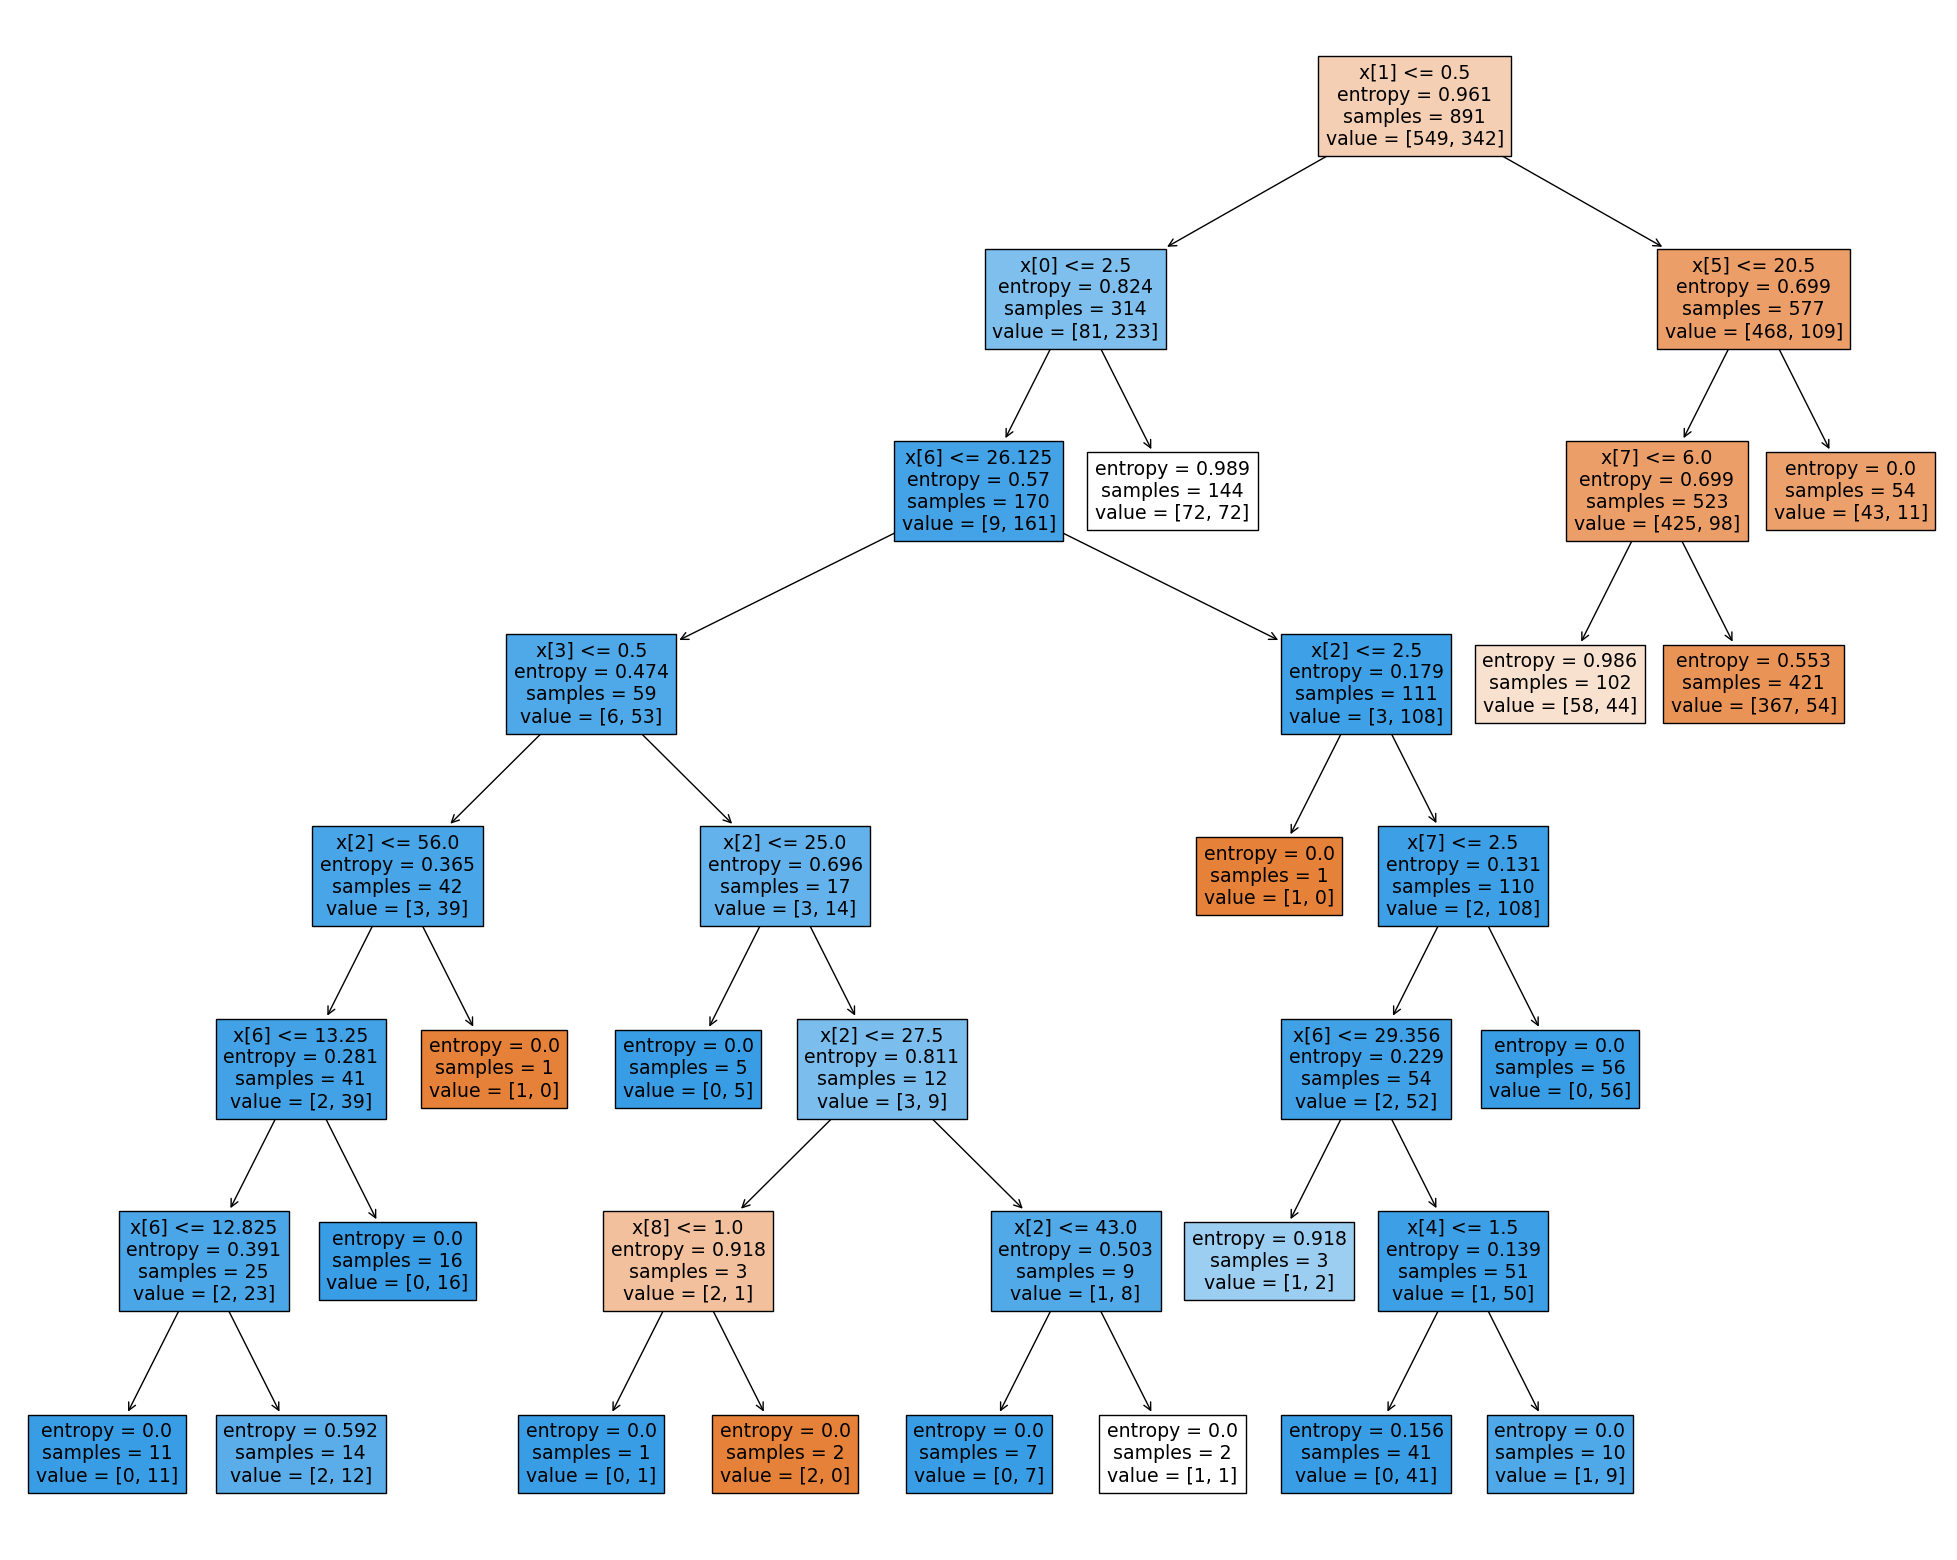

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_decision_tree, filled=True)

It appears that the decision tree is less prone to overfitting as it is less deep than the previous one that wa attained.

### Handling categorical data with One-Hot Encoding
Currently, some of the categorical data are interpreted as mere numbers, I will try to improve the model by handling the categorical data with a One-Hot Encoding instead of a Integer Encoding.

In [48]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#### Redoing the data preprocessing

In [49]:
# Columns that will be used
input_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket_Code', 'Fare', 'Cabin_Code', 'Embarked', 'Title']
output_column = ['Survived']

# Data encoded with the ordinal encoder
numerical_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
ordinal_encoder_columns = []
one_hot_encoder_columns = ['Sex', 'Cabin_Code', 'Embarked', 'Ticket_Code', 'Title']

In [50]:
# Copying the data
data_training_2 = data_training.copy()
data_goal_2 = data_goal.copy()

all_data = pd.concat([data_training_2.loc[:, input_columns], data_goal_2.loc[:, input_columns]])

# Ordinal encoded data
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(all_data[ordinal_encoder_columns])
all_data[ordinal_encoder_columns] = ordinal_encoder.transform(all_data[ordinal_encoder_columns])

# One hot encoded data
one_hot_encoder = OneHotEncoder(drop='if_binary')
one_hot_encoder.fit(all_data[one_hot_encoder_columns].values)
one_hot_encoded_feature_names = one_hot_encoder.get_feature_names_out(one_hot_encoder_columns)
one_hot_encoded_feature_values = one_hot_encoder.transform(all_data[one_hot_encoder_columns].values).toarray()
all_data[one_hot_encoded_feature_names.flatten()] = one_hot_encoded_feature_values

In [51]:
data_training_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_Num,Ticket_Code,Ticket_Code_Num,Cabin_Code,Cabin_Code_Num,Embarked_Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,A5,3,NaN,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,PC,12,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,STONO2,28,NaN,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,,0,C,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,,0,NaN,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,1,,0,NaN,8,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,,0,B,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,WC,31,NaN,8,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,,0,C,2,0


In [52]:
# all_data[one_hot_encoder_columns].values
all_data[one_hot_encoded_feature_names.flatten()].head(n=10)

,Sex_male,Cabin_Code_A,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,Cabin_Code_E,Cabin_Code_F,Cabin_Code_G,Cabin_Code_T,Cabin_Code_nan,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_th
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
# Reconstitute de dataset (separated between working dataset and goal dataset)
dataset_all = all_data.loc[:, ~all_data.columns.isin(one_hot_encoder_columns)]
dataset_training_2, dataset_goal_2  = dataset_all.iloc[:len(data_training_2)], dataset_all.iloc[len(data_training_2):]

# Prepare the data we will be working with
X_goal = dataset_goal_2
X, Y = dataset_training_2, data_training_2.loc[:, output_column]

In [54]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2,  
                                                    random_state=None, 
                                                    shuffle=True, 
                                                    stratify=None)

In [55]:
# # Training the model
clf_decision_tree = tree.DecisionTreeClassifier()

In [56]:
# Determining a validation accuracy
validation_accurcy = cross_val_score(clf_decision_tree, 
                                     X_train, 
                                     y=y_train, 
                                     scoring=None, 
                                     cv=8).mean()
print('Validation accuracy:', validation_accurcy)

Validation accuracy: 0.776685393258427


In [57]:
evaluate_test_accuracy(clf_decision_tree)

Test accuracy score: 0.7486033519553073


In [58]:
# Visualizaing which features are more correlated to the 'survived' feature
labeled_dataset_training_2 = X_train.iloc[:]
labeled_dataset_training_2.insert(0, 'Survived', y_train)
print(labeled_dataset_training_2.corr()['Survived'].to_string())

Survived                 1.000000
Pclass                  -0.306741
Age                     -0.130179
SibSp                   -0.020079
Parch                    0.101600
Fare                     0.250501
Sex_male                -0.562204
Cabin_Code_A             0.011898
Cabin_Code_B             0.158476
Cabin_Code_C             0.112924
Cabin_Code_D             0.150478
Cabin_Code_E             0.137108
Cabin_Code_F             0.076519
Cabin_Code_G             0.037253
Cabin_Code_T            -0.029838
Cabin_Code_nan          -0.307277
Embarked_C               0.174728
Embarked_Q               0.010151
Embarked_S              -0.158894
Embarked_nan                  NaN
Ticket_Code_            -0.002970
Ticket_Code_A2                NaN
Ticket_Code_A4          -0.079280
Ticket_Code_A5          -0.081733
Ticket_Code_AQ3               NaN
Ticket_Code_AQ4               NaN
Ticket_Code_C           -0.021234
Ticket_Code_CA          -0.003523
Ticket_Code_CASOTON     -0.029838
Ticket_Code_FA

In [59]:
prepare_submission(clf_decision_tree)

** A score of 0.72727 was achieved

#### Doing some tuning

In [60]:
param_grid = {"criterion": ['gini', 'entropy', 'log_loss'],
              "max_depth": np.arange(start=3, stop=30),
              "min_samples_split": np.arange(start=5, stop=30, step=2),
              "max_leaf_nodes": np.arange(start=4, stop=40, step=4)}

gridSearch = GridSearchCV(estimator=clf_decision_tree,
                          param_grid=param_grid,
                          n_jobs=None,
                          cv=5,
                          verbose=1,
                          refit=True)

In [61]:
_ = gridSearch.fit(X_train, y_train)
print("Best score:", gridSearch.best_score_, "\nObtained with the parameters:", gridSearch.best_params_)
clf_decision_tree.set_params(**gridSearch.best_params_)

Fitting 5 folds for each of 9477 candidates, totalling 47385 fits
Best score: 0.8399389343051314 
Obtained with the parameters: {'criterion': 'gini', 'max_depth': 22, 'max_leaf_nodes': 20, 'min_samples_split': 25}


DecisionTreeClassifier(max_depth=22, max_leaf_nodes=20, min_samples_split=25)

In [62]:
evaluate_test_accuracy(clf_decision_tree)

Test accuracy score: 0.7821229050279329


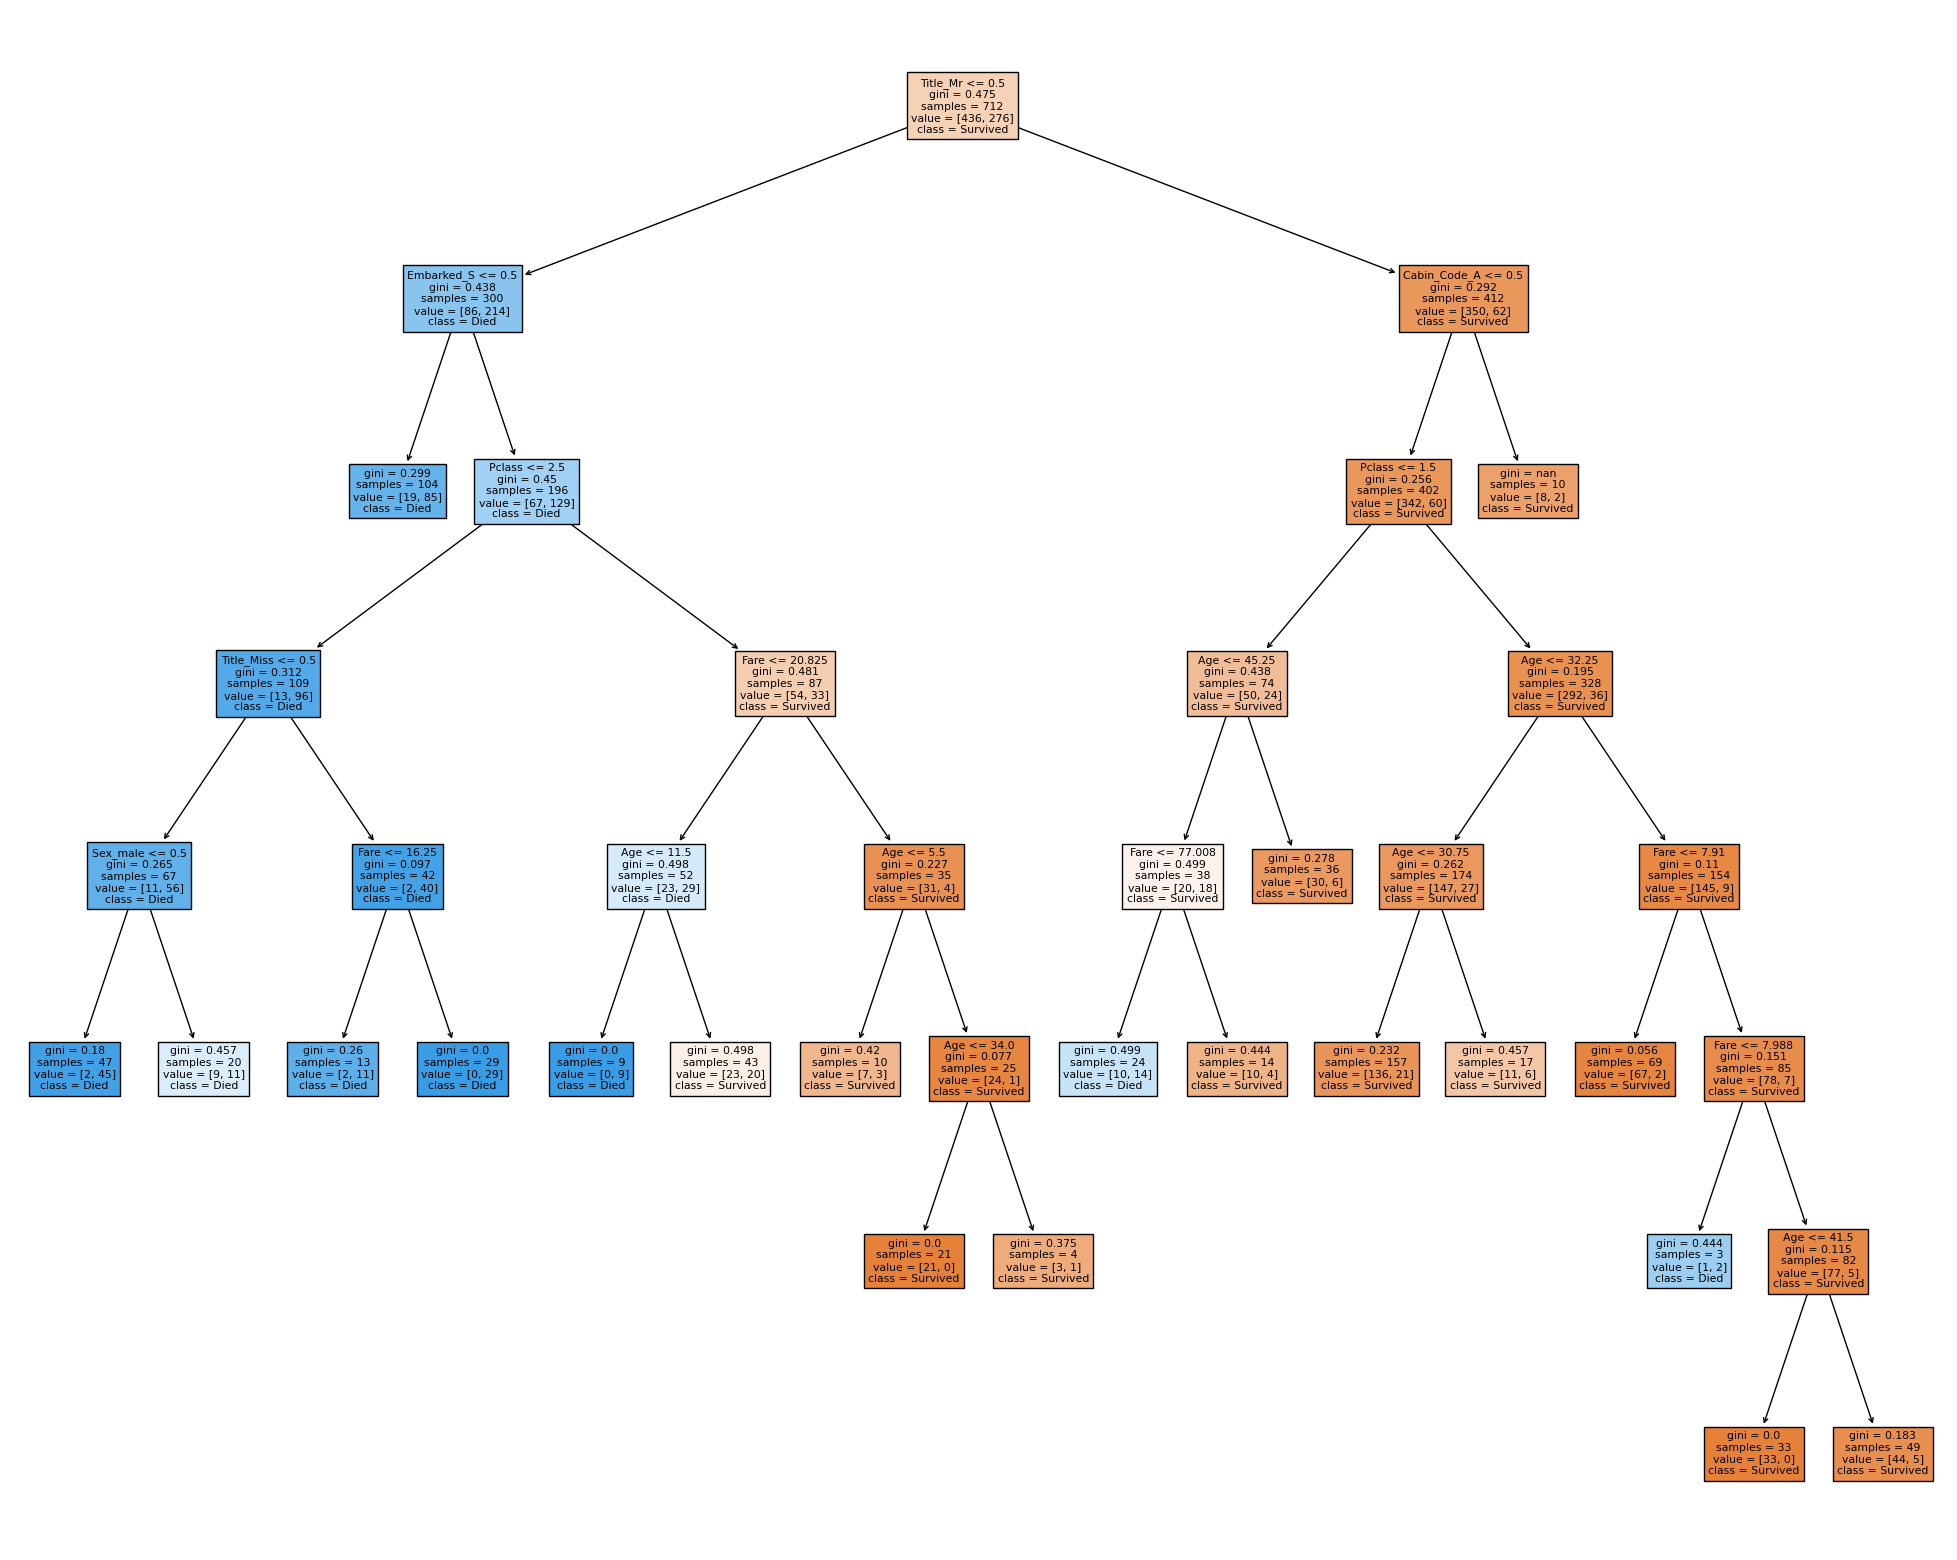

In [63]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_decision_tree, 
                   feature_names=X.columns.tolist(),  
                   class_names=['Survived', 'Died'],
                   filled=True)

In [64]:
prepare_submission(clf_decision_tree)

** A score of 0.75598 was achieved

## Experimenting with a Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

### Using the classifier naively

In [66]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_Code_A,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_th
2,3,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,3,19.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
871,1,47.0,1,1,52.5542,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
574,3,16.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,1,27.0,0,0,76.7292,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,3,30.0,0,0,7.2500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
231,3,29.0,0,0,7.7750,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
282,3,16.0,0,0,9.5000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
748,1,19.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
clf_random_forest = RandomForestClassifier()

In [69]:
# clf_random_forest.fit(X_train, y=y_train)

In [70]:
# Determining a validation accuracy
# validation_accurcy = cross_val_score(clf_random_forest, 
#                                      X_train, 
#                                      y=y_train, 
#                                      scoring=None, 
#                                      cv=8).mean()
# print('Validation accuracy:', validation_accurcy)

In [71]:
# evaluate_test_accuracy(clf_random_forest)

In [72]:
# clf_random_forest.fit()